Conv x 8 + F.C. x 3 with drop out added

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)
classes=('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 11 Layers : 8 conv layers and 3 fully connected layers !
        self.conv1 = nn.Conv2d(3, 8, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 12, 3,padding=1)
        self.conv2_drop = nn.Dropout2d(p=0.2)
        self.conv3 = nn.Conv2d(12,20, 3,padding=1)
        self.conv4 = nn.Conv2d(20,24, 3,padding=1)
        self.conv4_drop = nn.Dropout2d(p=0.2)
        self.conv5 = nn.Conv2d(24,32, 3,padding=1)
        self.conv6 = nn.Conv2d(32,48, 3,padding=1)
        self.conv6_drop = nn.Dropout2d(p=0.2)
        self.conv7 = nn.Conv2d(48,64, 3,padding=1)
        self.conv8 = nn.Conv2d(64,72, 3,padding=1)
        self.conv8_drop = nn.Dropout2d(p=0.2)
        self.conv9 = nn.Conv2d(72,80, 3,padding=1)
        self.fc1 = nn.Linear(80*4*4, 120)
        self.fc1_drop = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 84)
        self.fc2_drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(84, 10)

        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.conv2_drop(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv2_drop(F.relu(self.conv4(x)))
        x = F.relu(self.conv5(x))
        x = self.conv2_drop(self.pool(F.relu(self.conv6(x))))
        x = F.relu(self.conv7(x))
        x = self.conv2_drop(F.relu(self.conv8(x)))
        x = self.pool(F.relu(self.conv9(x)))

        x = x.view(-1, 80*4*4)
        x = self.fc1_drop(F.relu(self.fc1(x)))
        x = self.fc2_drop(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [6]:
# Function to create an instance of the model on CUDA
def new_net(lrate,wd):

    net = Net().cuda()

    # net=Net()

    lossvsiter=[]

    # To see if the model is on CUDA or not !
    if (next(net.parameters()).is_cuda) :
        print("The model is on CUDA")
    else :
        print("The model is on CPU")

    # Import the optimizers 
    import torch.optim as optim

    # Declare a loss function
    criterion = nn.CrossEntropyLoss()

    # Declare an optimizer
    optimizer = optim.Adam(net.parameters(),lr=lrate,weight_decay=wd)

    #No of iterations !
    iterations = 25


    for epoch in range(iterations):  # loop over the dataset multiple times

        # Reset the loss for the current epoch !
        running_loss = 0.0

        # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable & if possible make them cuda tensors
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

            # zero the parameter gradients for the current epoch
            optimizer.zero_grad()

            # forward + backward + optimize

            # forward
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # Calculate gradients of whatever variable set to req_gardients = True
            loss.backward()

            # Take one step of the gradient descent for this epoch ! 
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                lossvsiter.append(running_loss / 2000)
                running_loss = 0.0


    print('Finished Training')
    return lossvsiter,net

In [7]:
learnin_rate_sample=[0.0005,0.0007,0.001,0.0001,]
weight_decay_smaple=[1e-6,1e-7,1e-5,1e-4,1e-3,1e-2]

In [9]:
lossvsiter_crazy_architecture_with_dropout,model_crazy_architecture_with_dropout=new_net(0.0001,1e-7)

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 2.263
[Epoch :: 1, Mini Batch ::  4000] loss: 2.156
[Epoch :: 1, Mini Batch ::  6000] loss: 2.073
[Epoch :: 1, Mini Batch ::  8000] loss: 2.027
[Epoch :: 1, Mini Batch :: 10000] loss: 1.983
[Epoch :: 1, Mini Batch :: 12000] loss: 1.938
[Epoch :: 2, Mini Batch ::  2000] loss: 1.903
[Epoch :: 2, Mini Batch ::  4000] loss: 1.865
[Epoch :: 2, Mini Batch ::  6000] loss: 1.846
[Epoch :: 2, Mini Batch ::  8000] loss: 1.806
[Epoch :: 2, Mini Batch :: 10000] loss: 1.791
[Epoch :: 2, Mini Batch :: 12000] loss: 1.787
[Epoch :: 3, Mini Batch ::  2000] loss: 1.732
[Epoch :: 3, Mini Batch ::  4000] loss: 1.739
[Epoch :: 3, Mini Batch ::  6000] loss: 1.711
[Epoch :: 3, Mini Batch ::  8000] loss: 1.696
[Epoch :: 3, Mini Batch :: 10000] loss: 1.697
[Epoch :: 3, Mini Batch :: 12000] loss: 1.656
[Epoch :: 4, Mini Batch ::  2000] loss: 1.654
[Epoch :: 4, Mini Batch ::  4000] loss: 1.646
[Epoch :: 4, Mini Batch ::  6000] loss: 1.624
[Epoch :: 4, 

In [11]:
import pickle

with open("./results/model_crazy_architecture_with_dropout.pkl","wb") as f:
    pickle.dump(model_crazy_architecture_with_dropout,f)
    
with open("./results/lossvsiter_crazy_architecture_with_dropout.pkl","wb") as f:
    pickle.dump(lossvsiter_crazy_architecture_with_dropout,f)

In [12]:
def test_accuracy(model):
    correct = 0
    total = 0

    for data in testloader:
        images, labels = data
        images=images.cuda()
        labels=labels.cuda()
        try:
            outputs = model(Variable(images))
        except RuntimeError as re:
            print(outputs.is_cuda)
            print(str(re))
            sys.exit()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy_percentage= 100 * correct / total

    print('Accuracy of the network on the 10000 test images: %d' % (accuracy_percentage))
    print("The network predicted correct for %s"%(correct))
    return accuracy_percentage,correct

In [16]:
def train_accuracy(model):
    net=model
    total=0
    correct=0
    for i, data in enumerate(trainloader, 0):
        images, labels = data
        images=images.cuda()
        labels=labels.cuda()
        try:
            outputs = net(Variable(images))
        except RuntimeError as re:
            print(outputs.is_cuda)
            print(str(re))
            sys.exit()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        if (i%1000) == 0:
            print(i)

    print('Accuracy of the network on the 50000 trained images: %d %%' % (
        100 * correct / total))

In [14]:
test_accuracy(model_crazy_architecture_with_dropout)

Accuracy of the network on the 10000 test images: 66
The network predicted correct for 6607


(66.07, 6607)

In [17]:
train_accuracy(model_crazy_architecture_with_dropout)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 71 %


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

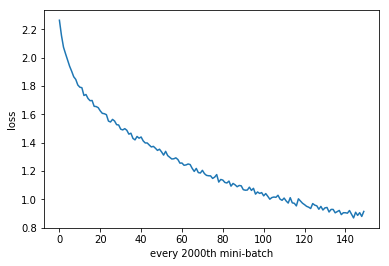

In [19]:
plt.plot(lossvsiter_crazy_architecture_with_dropout)
plt.ylabel('loss')
plt.xlabel('every 2000th mini-batch')
plt.show()

In [15]:
# Lets save the model !!

In [21]:
torch.save(model_crazy_architecture_with_dropout.state_dict(),"./models/model_crazy_architecture_with_dropout")

In [22]:
# Clearly the loss is decreasing so lets train it more

In [24]:
net=model_crazy_architecture_with_dropout
lossvsiter=lossvsiter_crazy_architecture_with_dropout
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 1.189
[Epoch :: 1, Mini Batch ::  4000] loss: 1.182
[Epoch :: 1, Mini Batch ::  6000] loss: 1.195
[Epoch :: 1, Mini Batch ::  8000] loss: 1.195
[Epoch :: 1, Mini Batch :: 10000] loss: 1.183
[Epoch :: 1, Mini Batch :: 12000] loss: 1.202
[Epoch :: 2, Mini Batch ::  2000] loss: 1.197
[Epoch :: 2, Mini Batch ::  4000] loss: 1.172
[Epoch :: 2, Mini Batch ::  6000] loss: 1.173
[Epoch :: 2, Mini Batch ::  8000] loss: 1.198
[Epoch :: 2, Mini Batch :: 10000] loss: 1.207
[Epoch :: 2, Mini Batch :: 12000] loss: 1.190
[Epoch :: 3, Mini Batch ::  2000] loss: 1.176


KeyboardInterrupt: 

Process Process-69:
Process Process-70:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sangeet/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/home/sangeet/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
  

In [33]:
model_crazy_architecture_with_dropout.load_state_dict(torch.load("./models/model_crazy_architecture_with_dropout"))

In [34]:
model_crazy_architecture_with_dropout.eval()

Net (
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(8, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_drop): Dropout2d (p=0.2)
  (conv3): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(20, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_drop): Dropout2d (p=0.2)
  (conv5): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_drop): Dropout2d (p=0.2)
  (conv7): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(64, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8_drop): Dropout2d (p=0.2)
  (conv9): Conv2d(72, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear (1280 -> 120)
  (fc1_drop): Dropout (p = 0.5)
  (fc2): Linear (120 -> 84)
  (fc2_drop)

In [35]:
# stopped the above kenel as it was a very slow movement !
# Lets try a different optimzation algorithm

In [36]:
net=model_crazy_architecture_with_dropout
lossvsiter=lossvsiter_crazy_architecture_with_dropout
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
#optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

optimizer = torch.optim.Adadelta(net.parameters(),lr=0.0005)

# Lets use an lr scheduler

#scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,verbose=True)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()
#         scheduler.step(loss)

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 0.626
[Epoch :: 1, Mini Batch ::  4000] loss: 0.604
[Epoch :: 1, Mini Batch ::  6000] loss: 0.613
[Epoch :: 1, Mini Batch ::  8000] loss: 0.580
[Epoch :: 1, Mini Batch :: 10000] loss: 0.590
[Epoch :: 1, Mini Batch :: 12000] loss: 0.598
[Epoch :: 2, Mini Batch ::  2000] loss: 0.589
[Epoch :: 2, Mini Batch ::  4000] loss: 0.592
[Epoch :: 2, Mini Batch ::  6000] loss: 0.596
[Epoch :: 2, Mini Batch ::  8000] loss: 0.575
[Epoch :: 2, Mini Batch :: 10000] loss: 0.570
[Epoch :: 2, Mini Batch :: 12000] loss: 0.570
[Epoch :: 3, Mini Batch ::  2000] loss: 0.580
[Epoch :: 3, Mini Batch ::  4000] loss: 0.570
[Epoch :: 3, Mini Batch ::  6000] loss: 0.576
[Epoch :: 3, Mini Batch ::  8000] loss: 0.589
[Epoch :: 3, Mini Batch :: 10000] loss: 0.575
[Epoch :: 3, Mini Batch :: 12000] loss: 0.560
[Epoch :: 4, Mini Batch ::  2000] loss: 0.569
[Epoch :: 4, Mini Batch ::  4000] loss: 0.577
[Epoch :: 4, Mini Batch ::  6000] loss: 0.554
[Epoch :: 4, 

In [37]:
test_accuracy(model_crazy_architecture_with_dropout)

Accuracy of the network on the 10000 test images: 74
The network predicted correct for 7450


(74.5, 7450)

In [38]:
torch.save(model_crazy_architecture_with_dropout.state_dict(),"./models/model_crazy_architecture_with_dropout-75-epochs")

In [39]:
train_accuracy(model_crazy_architecture_with_dropout)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 81 %


In [40]:
net=model_crazy_architecture_with_dropout
lossvsiter=lossvsiter_crazy_architecture_with_dropout
# To see if the model is on CUDA or not !
if (next(net.parameters()).is_cuda) :
    print("The model is on CUDA")
else :
    print("The model is on CPU")

# Import the optimizers 
import torch.optim as optim

# Declare a loss function
criterion = nn.CrossEntropyLoss()

# Declare an optimizer
#optimizer = optim.Adam(net.parameters(),lr=0.0005,weight_decay=1e-7)

optimizer = torch.optim.Adam(net.parameters(),lr=0.0005)

# Lets use an lr scheduler

#scheduler=optim.lr_scheduler.ReduceLROnPlateau(optimizer,patience=3,verbose=True)

#No of iterations !
iterations = 25


for epoch in range(iterations):  # loop over the dataset multiple times

    # Reset the loss for the current epoch !
    running_loss = 0.0

    # Loop over all the mini-batches therea are 12500 mini batches of size 4 each !
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable & if possible make them cuda tensors
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())

        # zero the parameter gradients for the current epoch
        optimizer.zero_grad()

        # forward + backward + optimize

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Calculate gradients of whatever variable set to req_gardients = True
        loss.backward()

        # Take one step of the gradient descent for this epoch ! 
        optimizer.step()
#         scheduler.step(loss)

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[Epoch :: %d, Mini Batch :: %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            lossvsiter.append(running_loss / 2000)
            running_loss = 0.0


print('Finished Training')

The model is on CUDA
[Epoch :: 1, Mini Batch ::  2000] loss: 0.805
[Epoch :: 1, Mini Batch ::  4000] loss: 0.833
[Epoch :: 1, Mini Batch ::  6000] loss: 0.839
[Epoch :: 1, Mini Batch ::  8000] loss: 0.820
[Epoch :: 1, Mini Batch :: 10000] loss: 0.832
[Epoch :: 1, Mini Batch :: 12000] loss: 0.829
[Epoch :: 2, Mini Batch ::  2000] loss: 0.739
[Epoch :: 2, Mini Batch ::  4000] loss: 0.748
[Epoch :: 2, Mini Batch ::  6000] loss: 0.740
[Epoch :: 2, Mini Batch ::  8000] loss: 0.760
[Epoch :: 2, Mini Batch :: 10000] loss: 0.764
[Epoch :: 2, Mini Batch :: 12000] loss: 0.779
[Epoch :: 3, Mini Batch ::  2000] loss: 0.665
[Epoch :: 3, Mini Batch ::  4000] loss: 0.711
[Epoch :: 3, Mini Batch ::  6000] loss: 0.684
[Epoch :: 3, Mini Batch ::  8000] loss: 0.690
[Epoch :: 3, Mini Batch :: 10000] loss: 0.692
[Epoch :: 3, Mini Batch :: 12000] loss: 0.691
[Epoch :: 4, Mini Batch ::  2000] loss: 0.612
[Epoch :: 4, Mini Batch ::  4000] loss: 0.628
[Epoch :: 4, Mini Batch ::  6000] loss: 0.620
[Epoch :: 4, 

In [41]:
test_accuracy(model_crazy_architecture_with_dropout)

Accuracy of the network on the 10000 test images: 74
The network predicted correct for 7442


(74.42, 7442)

In [42]:
train_accuracy(model_crazy_architecture_with_dropout)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
Accuracy of the network on the 50000 trained images: 90 %
